In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_non_uniform_sampling(source, steps):
    shape = np.shape(source)
    height = shape[0]
    length = shape[1]
    
    x_centre = int(length/2)
    y_centre = int(height/2)
    radius = int(min(length, height)/2)
    
    pi = np.pi
    multiplier = 0.5
    x_coordinates = []
    y_coordinates = []

    for r in steps:
        number_of_points = (1/multiplier) * 2

        for j in range(int(number_of_points)):
            theta = j*pi*multiplier
            x = x_centre + (r * np.cos(theta))
            y = y_centre + (r * np.sin(theta))
            
            if(x<length and x>0 and y<height and y>0):
                x_coordinates.append(int(x))
                y_coordinates.append(int(y))

        multiplier = multiplier/2
    
    return x_coordinates, y_coordinates

def sort_counterclockwise(points, centre = None):
    if centre:
        centre_x, centre_y = centre
    else:
        centre_x, centre_y = sum([x for x,_ in points])/len(points), sum([y for _,y in points])/len(points)
    angles = [math.atan2(y - centre_y, x - centre_x) for x,y in points]
    counterclockwise_indices = sorted(range(len(points)), key=lambda i: angles[i])
    counterclockwise_points = [points[i] for i in counterclockwise_indices]
    return counterclockwise_points

def get_non_uniform_sampling_final(img, number_of_steps):
    shape = np.shape(img)
    height = shape[0]
    length = shape[1]
    radius = int(min(length, height)/2)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(blurred, 10, 100)
    arr_edge = np.where(edged==255)
    x_edge = arr_edge[1]
    y_edge = arr_edge[0]
    
    steps = np.linspace(0, radius, number_of_steps)

    for i in range(number_of_steps):
        steps[i] = steps[i] - int(math.pow(i, 3)) + int(math.pow(i, 1.5))

    steps = np.array(steps, dtype=int)
    
    x_coordinates, y_coordinates = get_non_uniform_sampling(img, steps)
    points = []
    for i , j in zip(x_edge, y_edge):
        points.append((i,j))
        
    sorted_points = sort_counterclockwise(points)
    t = np.transpose(sorted_points)
    x_edge = t[0]
    y_edge = t[1]

    interval = 2**(number_of_steps + 1)

    x_edge = np.array(x_edge[0::interval] ,dtype=int)
    y_edge = np.array(y_edge[0::interval], dtype=int)
    
    x_coordinates = np.concatenate([x_coordinates, x_edge])
    y_coordinates = np.concatenate([y_coordinates, y_edge])
    
    return x_coordinates, y_coordinates

(1248, 1664)


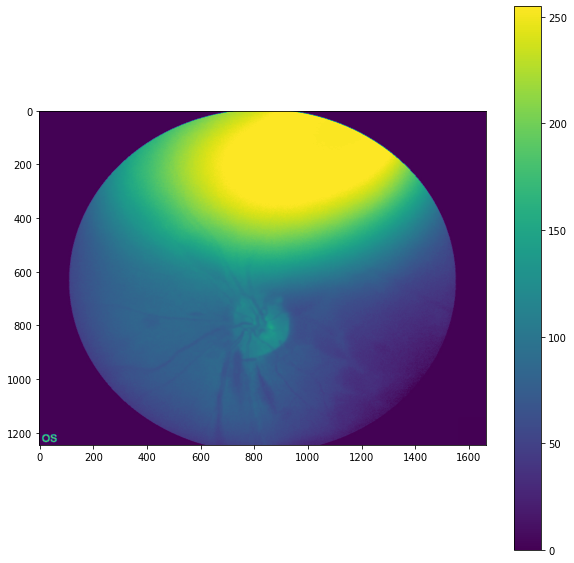

In [3]:
image = cv2.imread("./Images/OS0044EY.JPG")
image[1148:1247, 1564:1663, :] = 0
(B,G,R) = cv2.split(image)
#G = cv2.resize(G, (512,512))

plt.figure(figsize = (10,10))
plt.imshow(G)
plt.colorbar()

height = np.shape(G)[0]
length = np.shape(G)[1]
print(np.shape(G))

In [4]:
x, y = get_non_uniform_sampling_final(G, 5)

Text(0.5, 1.0, 'Canny Edge Detection')

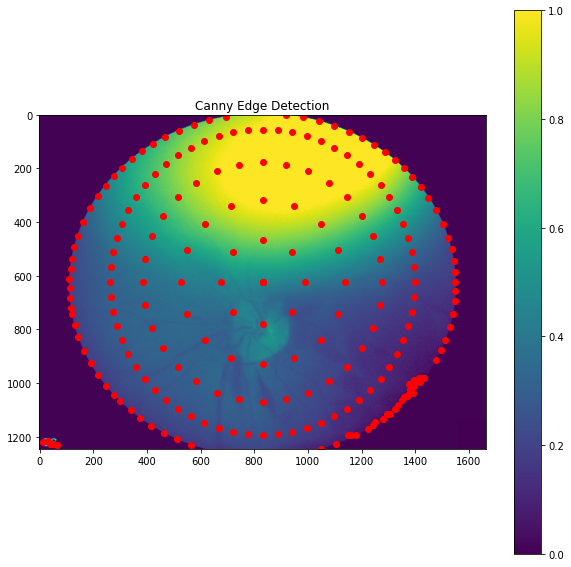

In [5]:
plt.figure(figsize = (10,10))
plt.imshow(G)
plt.scatter(x, y, color='red')
plt.colorbar()
plt.title("Canny Edge Detection")

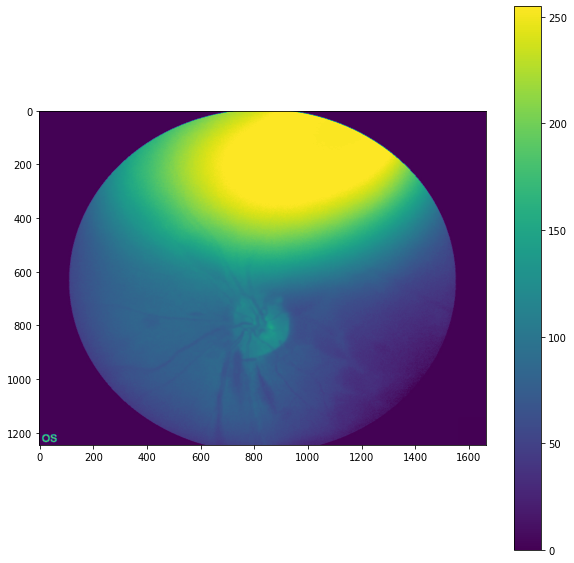

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(G)
plt.colorbar()

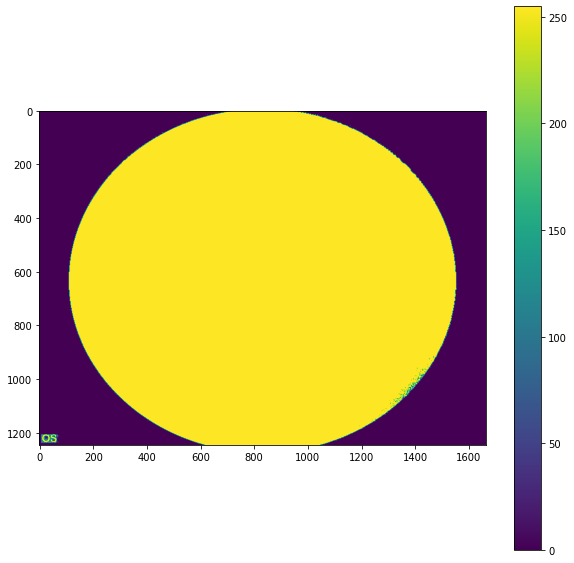

In [7]:
ret, thresh = cv2.threshold(G, 2, 255, cv2.THRESH_BINARY)

plt.figure(figsize = (10,10))
plt.imshow(thresh)
plt.colorbar()

Text(0.5, 1.0, 'Canny Edge Detection with Thresholding')

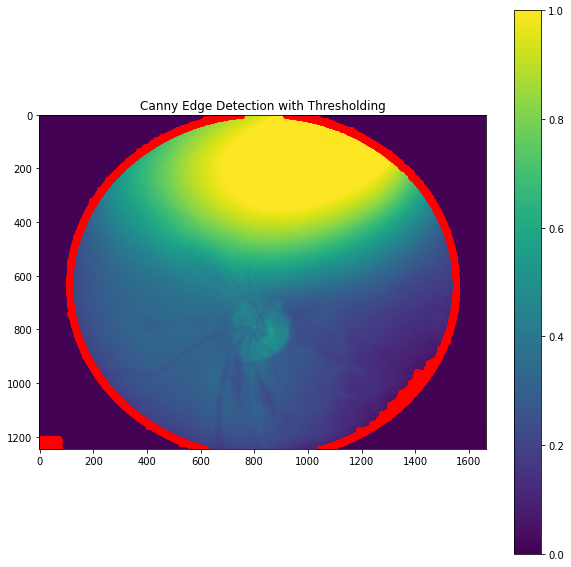

In [8]:
blurred = cv2.GaussianBlur(thresh, (3, 3), 0)
edged = cv2.Canny(blurred, 200, 255)

arr_edge = np.where(edged==255)
x_edge = arr_edge[1]
y_edge = arr_edge[0]

points = []
for i , j in zip(x_edge, y_edge):
    points.append((i,j))

sorted_points = sort_counterclockwise(points)
t = np.transpose(sorted_points)
x_edge = t[0]
y_edge = t[1]

# interval = 64
# x_edge = np.array(x_edge[0::interval] ,dtype=int)
# y_edge = np.array(y_edge[0::interval], dtype=int)

plt.figure(figsize = (10,10))
plt.imshow(G)
plt.scatter(x_edge, y_edge, color='red')
plt.colorbar()
plt.title("Canny Edge Detection with Thresholding")

In [9]:
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [10]:
clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(G) + 15

In [11]:
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

In [12]:
# imS = cv2.resize(final_img, (1080, 720)) 
# cv2.imshow("CLAHE image", imS)
# cv2.waitKey(0)

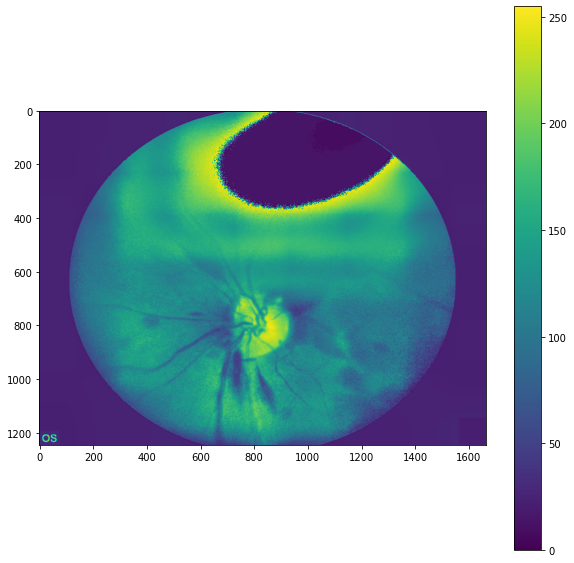

In [13]:
plt.figure(figsize = (10,10))
plt.imshow(final_img)
plt.colorbar()

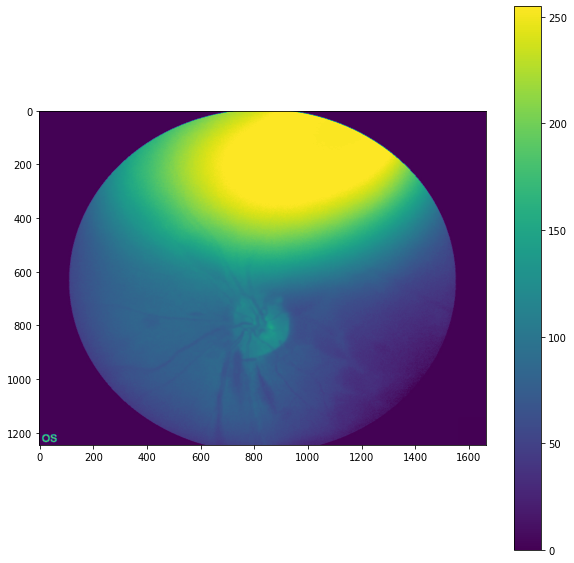

In [21]:
equ = cv2.equalizeHist(G)
plt.figure(figsize = (10,10))
plt.imshow(G)
plt.colorbar()

(1248, 1248)


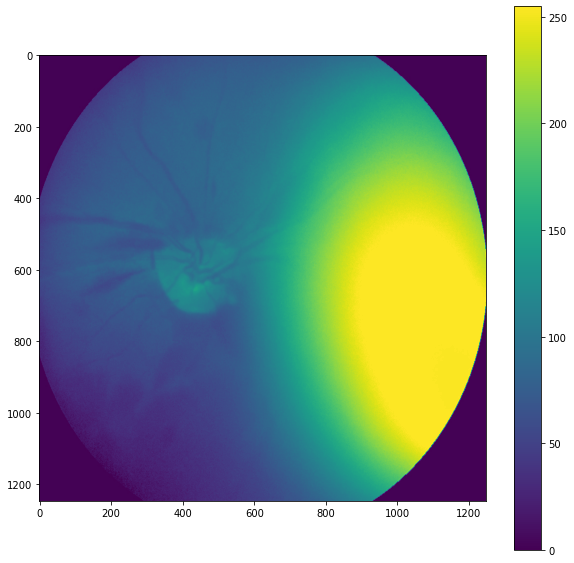

In [49]:
cropped = G[:,208:1456]
print(np.shape(cropped))
rotate = cv2.rotate(cropped, cv2.ROTATE_90_CLOCKWISE)
plt.figure(figsize = (10,10))
plt.imshow(rotate)
plt.colorbar()

In [50]:
image2 = cv2.imread("./Images/1.jpeg")
np.shape(image2)

(388, 448, 3)